# Jupyter Markdown и комментарии

# иит

# Заголовки

# Header 1
## Header 2
### Header 3
#### Header 4
##### Header 5
###### Header 6

# Шрифт

**This is bold text**  
__This is bold text__


*This is italic text*  
_This is italic text_


***Bold and Italic***  
___Bold and Italic___


~~Scratch this~~

# Экранирование кодовых символов

\# Not a header

# Новый абзац

Hello World!

We are learning Markdown.


# Разрыв строки

Hello World!  
We are learning Markdown.

# Цитата

> This is a blockquote

>> and then some more quote

>>> and then some more

# Разделители


Some first block of text

---

Then the second


***

Finally, the last one

# Списки

## Нумерованные

1. Cheese
2. Carrot
3. Coconut

## Буллетпоинты

- Cheese
- Carrot
- Coconut

### Больше примеров: https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd

# Двумерное динамическое программирование

## Расстояние Левенштейна

Расстояние Левенштейна, или редакционное расстояние, — метрика cходства между двумя строковыми последовательностями. Чем больше расстояние, тем более различны строки. Для двух одинаковых последовательностей расстояние равно нулю. По сути, это минимальное число односимвольных преобразований (удаления, вставки или замены), необходимых, чтобы превратить одну последовательность в другую

Например, LEV(’БИБА’, ‘БОБА’) = 1, так как потребуется провести одну замену ‘И’ на ‘О’

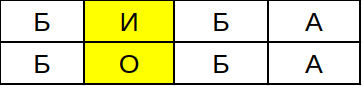

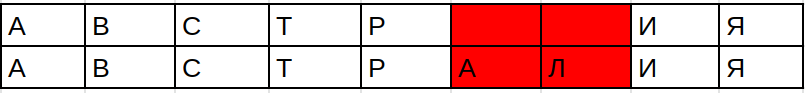

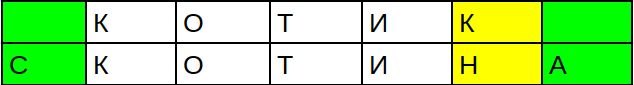

Расстояние Левенштейна активно используется для исправления ошибок в словах, поиска дубликатов текстов, сравнения геномов и прочих полезных операций с символьными последовательностями.

In [11]:
def levenstein(str_1, str_2):
    n, m = len(str_1), len(str_2)
    if n > m:
        str_1, str_2 = str_2, str_1
        n, m = m, n

    current_row = range(n + 1)
    for i in range(1, m + 1):
        print(current_row)
        previous_row, current_row = current_row, [i] + [0] * n
        for j in range(1, n + 1):
            add, delete, change = previous_row[j] + 1, current_row[j - 1] + 1, previous_row[j - 1]
            if str_1[j - 1] != str_2[i - 1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [12]:
levenstein('abcdef', 'abcdef')

range(0, 7)
[1, 0, 1, 2, 3, 4, 5]
[2, 1, 0, 1, 2, 3, 4]
[3, 2, 1, 0, 1, 2, 3]
[4, 3, 2, 1, 0, 1, 2]
[5, 4, 3, 2, 1, 0, 1]


0

In [3]:
levenstein('1abcdef', 'abcdef')

1

In [4]:
levenstein('1qwe425817sjiqjbcdef', 'abcdef')

15

## Поиск наибольшей общей подпоследовательности

Для двух данных строк найти такую строку наибольшей длины, которая была бы подпоследовательностью каждой из них. 

Обратите внимание! Подпоследовательность отличается от подстроки. Например, если есть исходная последовательность «ABCDEF», то «ACE» будет подпоследовательностью, но не подстрокой, а «ABC» будет как подпоследовательностью, так и подстрокой.

Начнём решение задачи с рассмотрения последних символов данных строк $a_{n-1}$ и $b_{m-1}$. Если эти символы совпадают, то они обязательно войдут последними символами и в наибольшую общую подпоследовательность данных строк. Таким образом, можно свести задачу нахождения наибольшей общей подпоследовательности для строк $A = a_{0}a_{1}a_{2}...a_{n-2}a_{n-1}$ и $B = b_{0}b_{1}b_{2}...b_{m-2}b_{m-1}$ к задаче нахождения наибольшей общей подпоследовательности для строк, полученных отбрасыванием от данных строк последнего символа, то есть для $a_{0}a_{1}a_{2}...a_{n-2}$ и $b_{0}b_{1}b_{2}...b_{m-2}$. Для того, чтобы получить ответ для исходных строк добавим к ответу для «укороченных» строк последние (равные) символы исходных строк ($a_{n-1}$ или $b_{m-1}$) и получим ответ для исходных строк.

Рассмотрим случай когда последние символы исходных строк не совпадают. Если это так, то эти символы ($a_{n-1}$ и $b_{m-1}$) не могут одновременно входить в наибольшую общую подпоследовательность, поэтому можно один из них отбросить. Тогда задача сводится к нахождению наибольшей общей подпоследовательности для одного из двух случаев - для строк $a_{0}a_{1}a_{2}...a_{n-2}$ и $b_{0}b_{1}b_{2}...b_{m-2}b_{m-1}$ или для строк $a_{0}a_{1}a_{2}...a_{n-2}a_{n-1}$ и $b_{0}b_{1}b_{2}...b_{m-2}$.

Мы свели задачу нахождения наибольшей общей подпоследовательности двух строк к меньшей задаче - нахождения наибольшей общей подпоследовательности для строк, полученных отбрасыванием последних символов от исходных строк, то есть для префиксов исходных строк. Воспользуемся принципом построения решения при помощи динамического программирования.

Обозначим за $F(i, j)$ длину наибольшей общей подпоследовательности для $A^{'} = A[:i]$ и $B^{'} = B[:j]$. Запишем рекуррентные соотношения. Если последние символы рассматриваемых строк $A^{'}$ и $B^{'}$ совпадают, т. е. $a_{i-1} = b_{j-1}$, то $F(i, j) = F(i-1, j-1) + 1$.
Если же последние символы рассматриваемых строк $A^{'}$ и $B^{'}$ не совпадают, то рассматриваем случаи $F(i-1, j)$ и $F(i, j-1)$. Для этого случае реккурентное соотношение имеет вид: $F(i, j) = max(F(i-1, j), F(i, j-1))$.

Зададим начальные значения функции $F$: если одна из строк - пустая, то общая подпоследовательность также пустая, то есть имеет длину 0: $F(0, j) = F(i, 0) = 0$. Далее создаём двумерный массив $(n+1)(m+1)$ и заполняем его по реккурентным соотношениям.

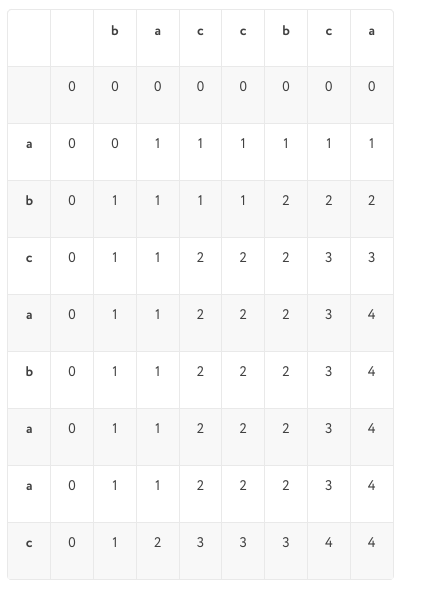

In [51]:
import numpy as np
np.zeros((5 + 1, 6 + 1)).tolist()

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [52]:
def largest_common_subsequence(a, b):
    import numpy as np
    n = len(a)
    m = len(b)
    F = np.zeros((n + 1, m + 1)).tolist()

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if a[i - 1] == b[j - 1]:
                F[i][j] = F[i - 1][j - 1] + 1 
            else: 
                F[i][j] = max(F[i - 1][j], F[i][j - 1]) 
    print(F[n][m])
    return F

In [53]:
A = 'abcabaac'
B = 'baccbca'
F = largest_common_subsequence(A, B)

4.0


In [54]:
A = ''
B = 'baccbca'
F = largest_common_subsequence(A, B)

0.0


In [55]:
A = 'baccbcare6t7t8y8sq8912345561njrt7'
B = 'baccbca123445abnjrtru7'
F = largest_common_subsequence(A, B)

17.0


А как найти саму наибольшую общую подпоследовательность?

Для этого выполним «обратный проход» по массиву $F$ начиная с последнего элемента. В каждой рассматриваемой ячейке $F[i][j]$ выясним, как было получено значение в этой ячейке. Это зависит от последних символов рассматриваемых префиксов. Если $a_{i-1} = b_{j-1}$, то тогда ответ для элемента $F[i][j]$ получен из $F[i-1][j-1]$ добавлением 1, поэтому перейдем к элементу $F[i-1][j-1]$, а к ответу добавим символ $a_{i-1} = b_{j-1}$. В противном случае нужно перейти к тому элементу $F[i-1][j]$ или $F[i][j-1]$, значение в котором совпадает со значением $F[i][j]$.  

In [58]:
a = 'abcabaac'
b = 'baccbca'

In [59]:
ans = []
i = len(a)
j = len(b)
while i > 0 and j > 0:
    if a[i-1] == b[j-1]:
        ans.append(a[i-1])
        i -= 1
        j -= 1
    elif F[i-1][j] == F[i][j]:
        i -= 1 
    else: 
        j -= 1 
ans = ans[::-1]
print(ans)

['b', 'c', 'b', 'a']


## Поиск наибольшей возрастающей подпоследовательности

Первый способ — отсортируем последовательность в порядке неубывания, удалим из нее повторяющиеся элементы (то есть получим строго возрастающую последовательность $B$ из элементов $b_0,b_1,..,b_{m-1}$. Теперь для последовательностей $A$ и $B$ найдем наибольшую общую подпоследовательность. Понятно, что эта подпоследовательность будет подпоследовательностью $A$, будет монотонно возрастать и будет иметь наибольшую длину из всех таких последовательностей. Сложность такого алгоритма будет $\mathcal{O}(n^2)$.

Второй способ решения - при помощи динамического программирования. Обозначим через $F(i)$ длину наибольшей возрастающей подпоследовательности, последним элементом которой будет элемент $a_i$. Тогда для вычисления значения $F(i)$ рассмотрим предпоследний элемент этой последовательности. Пусть это элемент $a_j$, тогда $j<i$ и $a_j<a_i$. Длина наибольшей возрастающей подпоследовательности, заканчивающейся $a_j$ есть F(i), значит, необходимо найти такое подходящее $j$, что $F(j)$ будет наибольшим. Итак, $F(i)=1+\min\limits_{j<i, a_j<a_i}F(j)$. Если же ни одного такого подходящего $j$ нет (то есть все $a_j\ge a_i$ при $j<i$), то $F(i)=1$.

Соответствующая программа вычисления значений функции  будет выглядеть так:

In [ ]:
a = [2,10,0,-1,100,200]
F = [0] * len(a)
for i in range(len(a)):
    for j in range(i):
        if a[j] < a[i] and F[j] > F[i]:
            F[i] = F[j]
    F[i] += 1
print(F[i])

In [ ]:
def step_counter(num):
    cache = [1] * 3 + [0] * (num - 3) * (num - 3 > 0)
    for i in range(4, num + 1):
        if i % 3 == 0:
            cache[i - 1] = min(cache[i // 3 - 1], cache[i - 2]) + 1
        elif i % 2 == 0:
            cache[i - 1] = min(cache[i // 2 - 1], cache[i - 2]) + 1
        else:
            cache[i - 1] = cache[i - 2] + 1
    return cache[-1]


print(step_counter(int(input())))

### Задача о кузнечике
Рассмотрим следующую задачу. На числовой прямой сидит кузнечик, который может прыгать вправо на одну или на две единицы. Первоначально кузнечик находится в точке с координатой 0. Определите количество различных маршрутов кузнечика, приводящих его в точку с координатой $n$.

In [ ]:
#trivial
def F(n, counter=0):
    if n < 2:
        return counter
    else:
        counter += 1
        return F(n - 1, counter) + F(n - 2, counter)

In [ ]:
F(4, counter=0)

Проблема - перекрытие рекурсивных вызовов. Решение - Динамическое программирование и числа Фибоначчи

In [ ]:
n=10
F = [0] * (n + 1)
F[0] = 1
F[1] = 1
for i in range(2, n + 1):
    F[i] = F[i - 2] + F[i - 1] 

### Воспроизводимость экспериментов с псевдослучайными числами

In [13]:
import random

random.seed(4242)
print(random.random())

0.8624508153567833


In [2]:
# random.getstate()

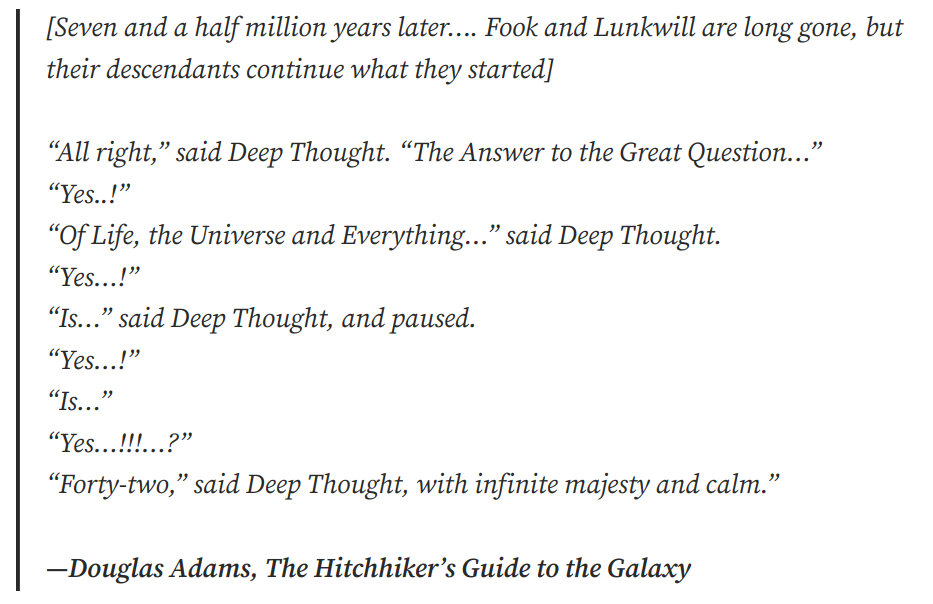

In [15]:
def foo(x):
    return x ** 2

In [16]:
from time import time
t0 = time()
y = foo(4)
print(time() - t0)

0.00026535987854003906


# Строчные методы

По методам строк можно посмотреть: https://pythonworld.ru/tipy-dannyx-v-python/stroki-funkcii-i-metody-strok.html

**Пример 1** (Поиск подстроки в строке)

Самый простой, но далеко не самый эффективный (Примитивный алгоритм) алгоритм поиска подстроки в строке основан на переборе всех подстрок, длина которых равна длине шаблона поиска, и посимвольном сравнении таких подстрок с шаблоном поиска. По традиции шаблон поиска или образец принято обозначать как needle (англ. «иголка»), а строку, в которой ведётся поиск — как haystack (англ. «стог сена»).

In [ ]:
needle = '31'
haystack = 'о3190qwerweop'

index = -1
for i in range(len(haystack)-len(needle)+1):
    success = True
    for j in range(len(needle)):
        if needle[j] != haystack[i+j]:
            success = False
            break
    if success:
        index = i
        break
print(index)

In [ ]:
needle = '31'
haystack = 'о319qwe31rweop'

In [ ]:
# first occurence
haystack.find(needle)

In [ ]:
# last occurence
haystack.rfind(needle)

### Алгоритм Кнута–Морриса-Пратта

Префикс-функция строки $\pi(S,i)$ – это длина наибольшего префикса строки S[1..i], который не совпадает с этой строкой и одновременно является ее суффиксом. Проще говоря, это длина наиболее длинного начала строки, являющегося также и ее концом. 

Алгоритм вычисления префикс-функции на языке Python:

In [ ]:
def prefix(s):
    v = [0]*len(s)
    for i in range(1,len(s)):
        k = v[i-1]
        while k > 0 and s[k] != s[i]:
            k = v[k-1]
        if s[k] == s[i]:
            k = k + 1
        v[i] = k
    return v

In [ ]:
def kmp(s,t):
    index = -1
    f = prefix(s)
    k = 0
    for i in range(len(t)):
        while k > 0 and s[k] != t[i]:
            k = f[k-1]
        if s[k] == t[i]:
            k = k + 1
        if k == len(s):
            index = i - len(s) + 1
            break
    return index

In [ ]:
t = '31'
s = 'о3190qwerweop'
kmp(s,t)

**Пример 2**

Требуется определить индексы первого и последнего вхождения буквы в строке. 
Для этого нужно написать функцию first_last(letter, st), включающую 2 параметра: letter – искомый символ, st – целевая строка. 
В случае отсутствия буквы в строке, нужно вернуть кортеж (None, None), если же она есть, то кортеж будет состоять из первого и последнего индекса этого символа.

In [ ]:
def first_last(letter, st):
    first = st.find(letter)
    if first < 0:
        return None, None
    last = st.rfind(letter)
    return first, last

# Тесты
print(first_last('a', 'abba'))
print(first_last('a', 'abbaaaab'))
print(first_last('a', 'a'))
print(first_last('a', 'spring'))

In [ ]:
a = 10.129
f'{a:.2f}'

In [ ]:
np.array([
    [1, 2, 3],
    [4, 5, 6], \
    [6, 7, 8]
])

## Задачи

1. С клавиатуры вводится строка, содержащая номера студентов (начинаются с 'student_' и далее трёхзначный номер) и их баллы за контрольную. Выведите номер студента, который получил максимальный балл.

Входные данные: Строка с номерами студентов и их баллами (номер студента 1, баллы студента 1, номер студента 2, баллы студента 2 и т. д.). Если два и более студента получили максимальный балл, то выводятся номера этих студентов через '-' (в том порядке, в котором они записаны в строке).

Выходные данные: номер (трёхзначный номер студента/студентов, который получил максимальный балл)

Пример:

Входные данные:

student_10221student_00246student_90789

Выходные данные:

907

In [70]:
s = input().split('student_')
t = {i[:3]:i[3:] for i in s[1:]}
m = max(t.values())
for i in t:
    if t.get(i) == m:
        print(i)

 student_10221student_00246student_90789


907


2. С клавиатуры вводятся радиус окружности и сторона квадрата (первым вводится радиус окружности). Необходимо рассчитать длину окружности, площадь круга ограниченного этой окружностью и площадь квадрата. На экран выводятся результаты вычисления в следующем виде:
'Длина окружности равно <длина окружности>. 
Площадь круга составляет <отношение площади круга к площади квадрата> % от площади квадрата.' Значения округляются до сотых. Вывод на экран должен быть реализован в одном print().

Входные данные:

2 3

Выходные данные:

Длина окружности равно 12.57.
Площадь круга составляет 139.63% от площади квадрата.

In [74]:
from numpy import pi


r, a = map(float, input().split())
area_square = a * a
lenght = 2 * pi * r
area_circle = pi * r * r
print(f'Длина окружности равна {lenght:.2f}. Площадь круга составляет {area_circle / area_square:.2%} от площади квадрата.')

 2 3


Длина окружности равна 12.57. Площадь круга составляет 139.63% от площади квадрата.


3. Напишите функцию, которая принимает на вход две строки и выводит одну строку, в которой для первых 2-х символов строк последовательность символом обратная и строки разделены символом '-'.

Пример:

Входные данные:

abc
xyzqw

Выходные данные:

bac-yxzqw

In [75]:
a, b = input().split()
print(f'{a[1] + a[0] + a[2:]}-{b[1] + b[0] + b[2:]}')

 abc xyzqw


bac-yxzqw


4. Напишите функцию, которая переводит строку введённую с клавиатуры к написанию заглавными буквами если как минимум 3 из 4-х первых символов строки заглавные. Если длина строки меньше 4-х, то проверяется условие, что все символы заглавные. Если это условие не выполнено, то выводится исходная строка.

Пример:

Входные данные:

PYThon3

Выходные данные:

PYTHON3

In [1]:
s = input()

if len(s) < 4:
    print(s)
else:
    if [s[i].isupper() for i in (0, 1, 2, 3)].count(False) == 1:
        print(s.upper())
    else:
        print(s)

 PYThon3


PYTHON3


5. Напишите функцию, которая принимает на вход строку и tag для HTML и выводит строку заключённую в нужный тег. К HTML элементам (тегам) отнесите следующие: a, abbr, b, body, caption, cite, code, div, form, h1, h2, h3, h4, h5, h6, header, i и s. Если в качестве тега введен отличный от вариантов выше, то вывести "Введён неверный тег".

Пример:

Входные данные:

i

Python

Выходные данные:

<i>Python</i>

In [62]:
def zak(teg, stroka):
    print(f"<{teg}>{stroka}</{teg}>")

zak('i', 'Python')

<i>Python</i>


питон вроде не умеет сам комипилить хтмл'евские теги......

6. С клавиатуры вводится строка. Если длина строки меньше или равна 2, то выводится ASCII код 1-го символа (т. е. с индексом 0), если больше 2, но меньше 10, то выводится сумма ASCII кодов 1-го (c 0-м индексом), серединного (если символов четной число, то берётся символ слева) и последнего. В случае, если длина строки более 10, то выводится ASCII код последнего символа.

Пример:

Входные данные:

ab

Выходные данные:

97

In [43]:
a = input()

if len(a) <= 2:
    print(ord(a[0]))  
elif len(a) < 10 and len(a) % 2:
    print(sum(map(ord, [a[0], a[len(a) // 2 - 1], a[-1]])))         
elif len(a) < 10 and not len(a) % 2:
    print(sum(map(ord, [a[0], a[len(a) // 2], a[-1]])))
else:
    print(ord(a[-1]))

 ab


97
